# Setup Path dan Impor Modul

In [1]:
import sys
import os
import pandas as pd
import numpy as np
from pprint import pprint 

# Menambahkan path ke direktori utama agar bisa mengimpor modul noventis
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Impor kelas yang akan digunakan
from noventis.data_cleaner import NoventisImputer
print('Successfully imported modules!')

Successfully imported modules!


# Memuat Dataset

In [2]:
try:
    df_ames = pd.read_csv('../dataset_for_examples/AmesHousing.csv')
    print("Dataset Ames Housing berhasil dimuat.")
except FileNotFoundError:
    print("Error: Pastikan file 'AmesHousing.csv' dari dataset Ames Housing ada di direktori yang sama dengan notebook Anda.")

Dataset Ames Housing berhasil dimuat.


# Cek Nilai yang Hilang (Null Values)

In [3]:
# --- Sel 3: Cek Nilai yang Hilang (Null Values) ---
print("Analisis Awal: 15 kolom dengan nilai hilang terbanyak")
null_counts = df_ames.isnull().sum()
print(null_counts[null_counts > 0].sort_values(ascending=False).head(15))

Analisis Awal: 15 kolom dengan nilai hilang terbanyak
Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
dtype: int64


# Contoh 1 - Menggunakan Mode Otomatis


📋======================= IMPUTATION SUMMARY =======================📋
Method                    | AUTO
Total Values Imputed      | 15749
Completion Score          | 100.00%

--- Laporan Detail (dari .get_quality_report()) ---
{'column_details': {'Alley': {'method': 'mode', 'missing_before': 2732},
                    'Bsmt Cond': {'method': 'mode', 'missing_before': 80},
                    'Bsmt Exposure': {'method': 'mode', 'missing_before': 83},
                    'Bsmt Full Bath': {'method': 'median', 'missing_before': 2},
                    'Bsmt Half Bath': {'method': 'median', 'missing_before': 2},
                    'Bsmt Qual': {'method': 'mode', 'missing_before': 80},
                    'Bsmt Unf SF': {'method': 'median', 'missing_before': 1},
                    'BsmtFin SF 1': {'method': 'median', 'missing_before': 1},
                    'BsmtFin SF 2': {'method': 'median', 'missing_before': 1},
                    'BsmtFin Type 1': {'method': 'mode', 'missing_before':

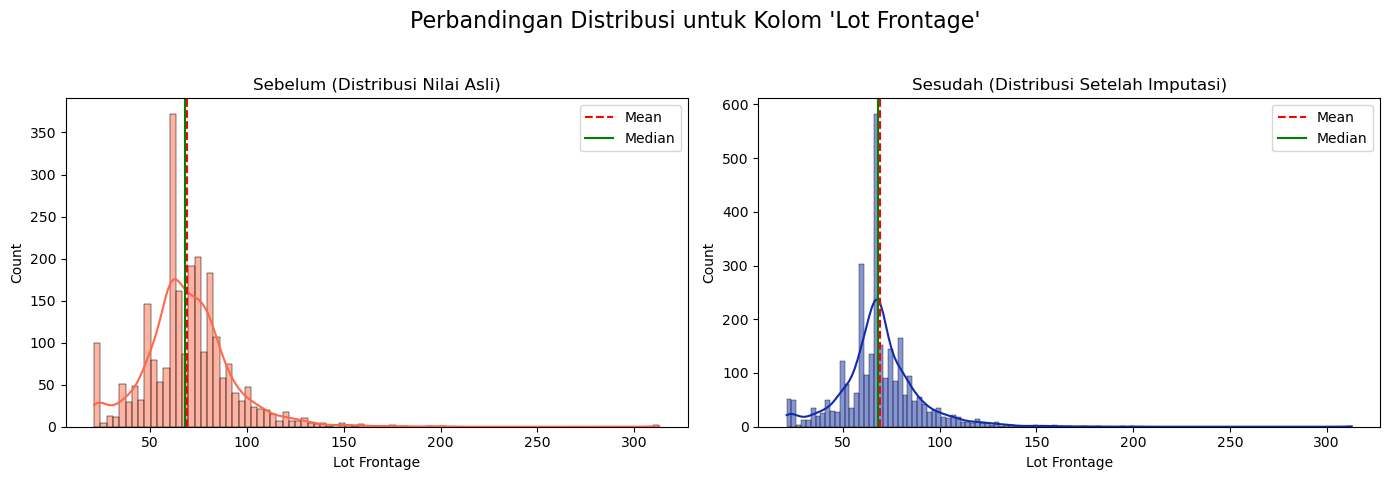

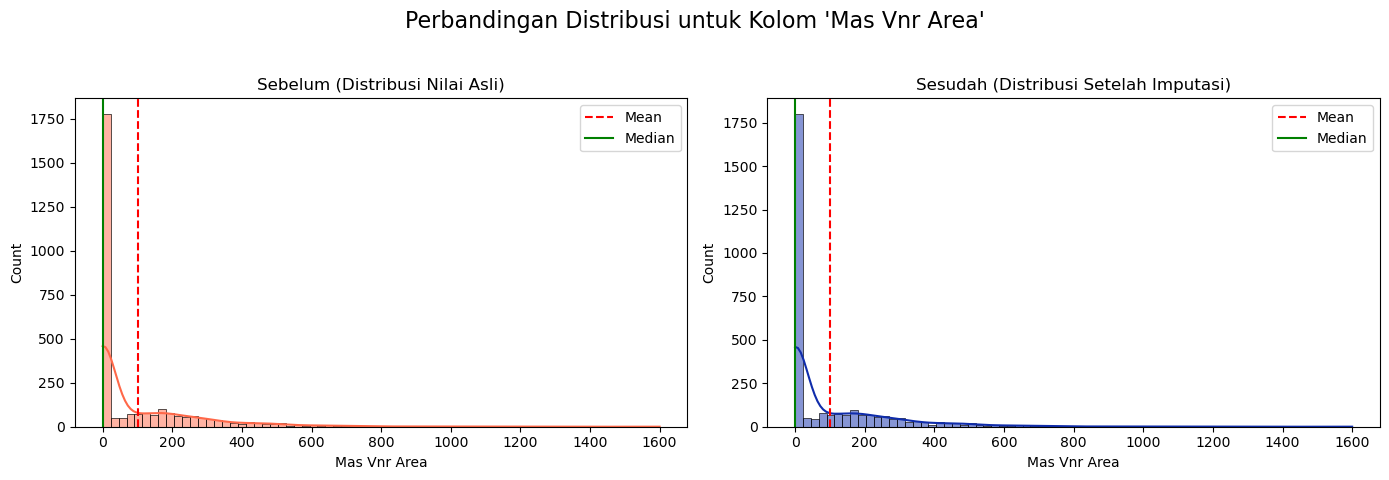

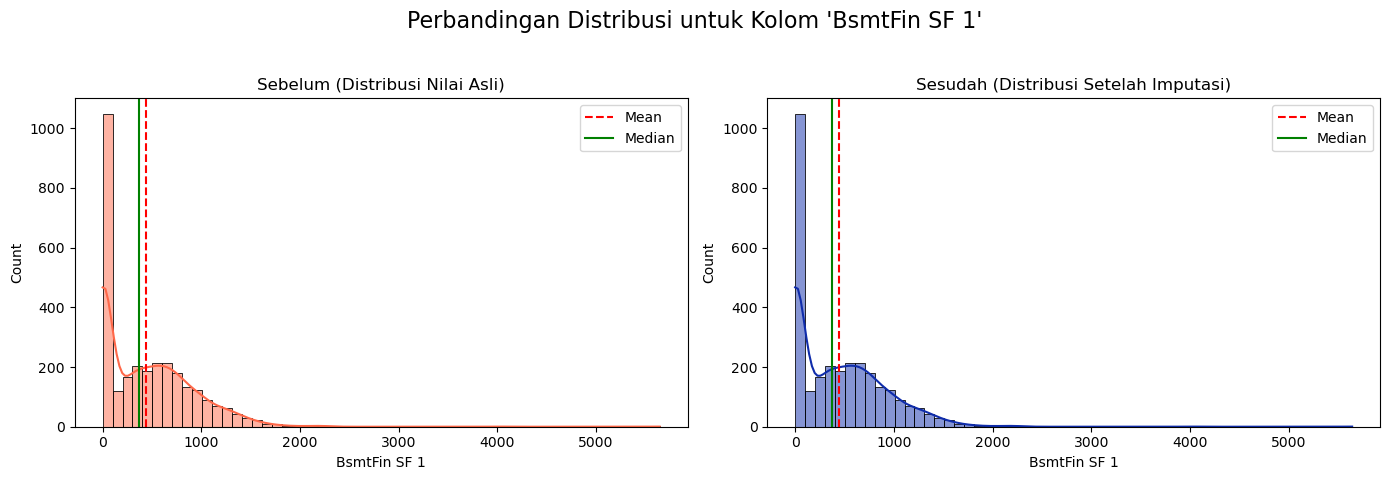

In [4]:
# Sel 5: Kode Contoh 1 - Mode Otomatis
imputer_auto = NoventisImputer(verbose=True) # verbose=True akan mencetak ringkasan
df_imputed_auto = imputer_auto.fit_transform(df_ames.copy())

# Tampilkan laporan detail dan visualisasi
print("\n--- Laporan Detail (dari .get_quality_report()) ---")
pprint(imputer_auto.get_quality_report())
imputer_auto.plot_comparison(max_cols=3)

# Contoh 2 - Menggunakan Metode Spesifik per Kolom

d:\BRAWIJAYA\BCC DS\NOVENTIS\Noventis-Data\noventis\data_cleaner\imputing.py:129: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  elif imputer in ['ffill', 'bfill']: df_out[col].fillna(method=imputer, inplace=True)
d:\BRAWIJAYA\BCC DS\NOVENTIS\Noventis-Data\noventis\data_cleaner\imputing.py:129: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  elif imputer in ['ffill', 'bfill']: df_out[col].fillna(method=imputer, inplace=True)
d:\BRAWIJAYA\BCC 


📋======================= IMPUTATION SUMMARY =======================📋
Method                    | CUSTOM MAP
Total Values Imputed      | 15749
Completion Score          | 100.00%

--- Laporan Detail (Metode Spesifik) ---
{'column_details': {'Alley': {'method': 'mode', 'missing_before': 2732},
                    'Bsmt Cond': {'method': 'mode', 'missing_before': 80},
                    'Bsmt Exposure': {'method': 'mode', 'missing_before': 83},
                    'Bsmt Full Bath': {'method': 'median', 'missing_before': 2},
                    'Bsmt Half Bath': {'method': 'median', 'missing_before': 2},
                    'Bsmt Qual': {'method': 'mode', 'missing_before': 80},
                    'Bsmt Unf SF': {'method': 'median', 'missing_before': 1},
                    'BsmtFin SF 1': {'method': 'median', 'missing_before': 1},
                    'BsmtFin SF 2': {'method': 'median', 'missing_before': 1},
                    'BsmtFin Type 1': {'method': 'ffill', 'missing_before': 80}

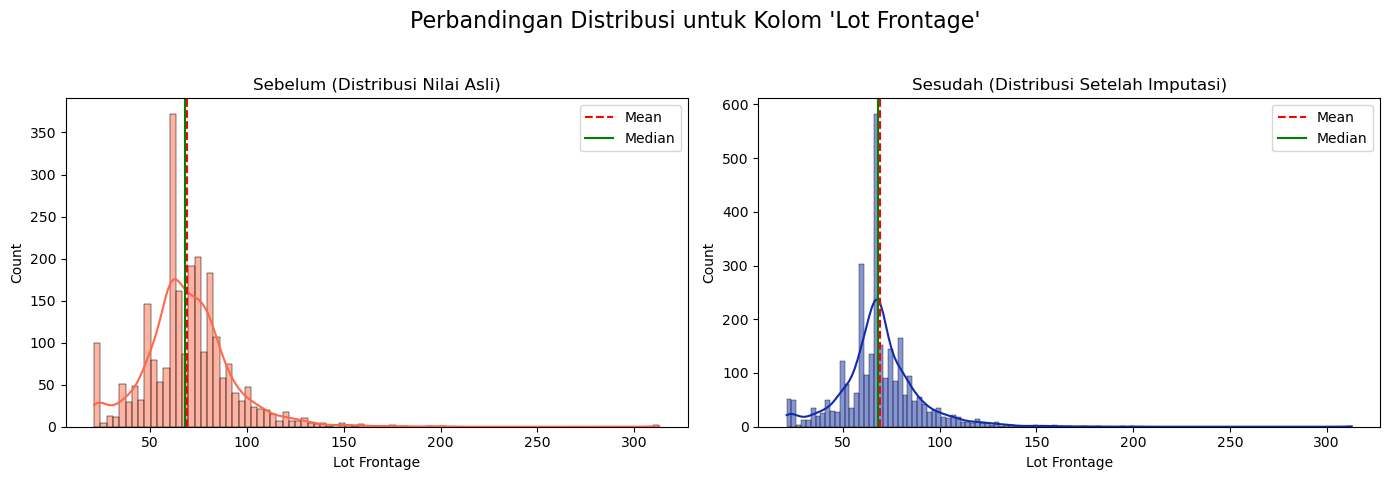

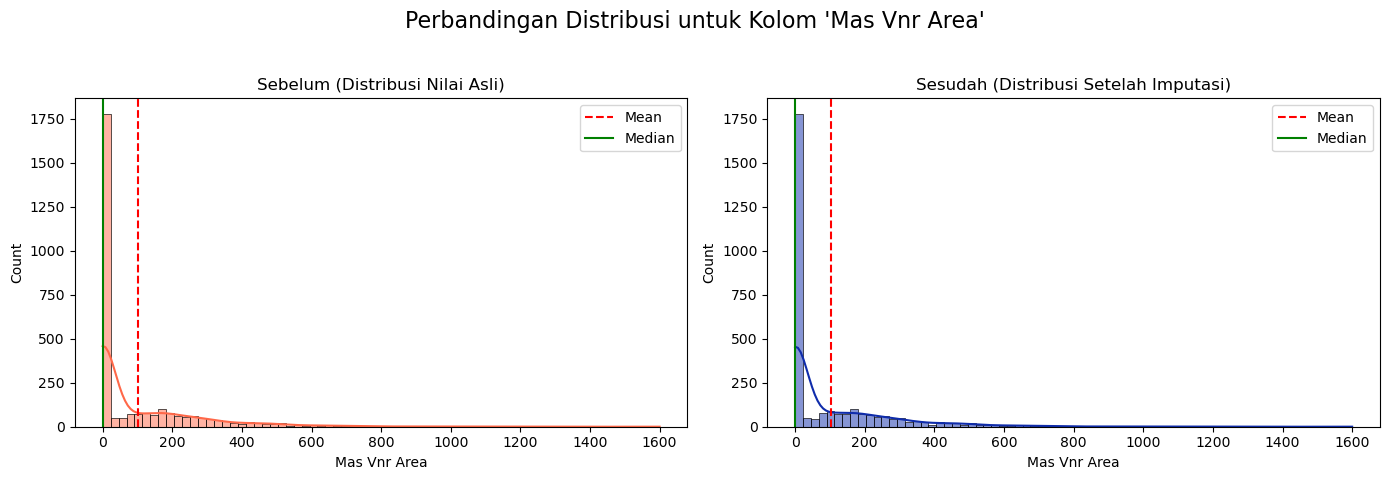

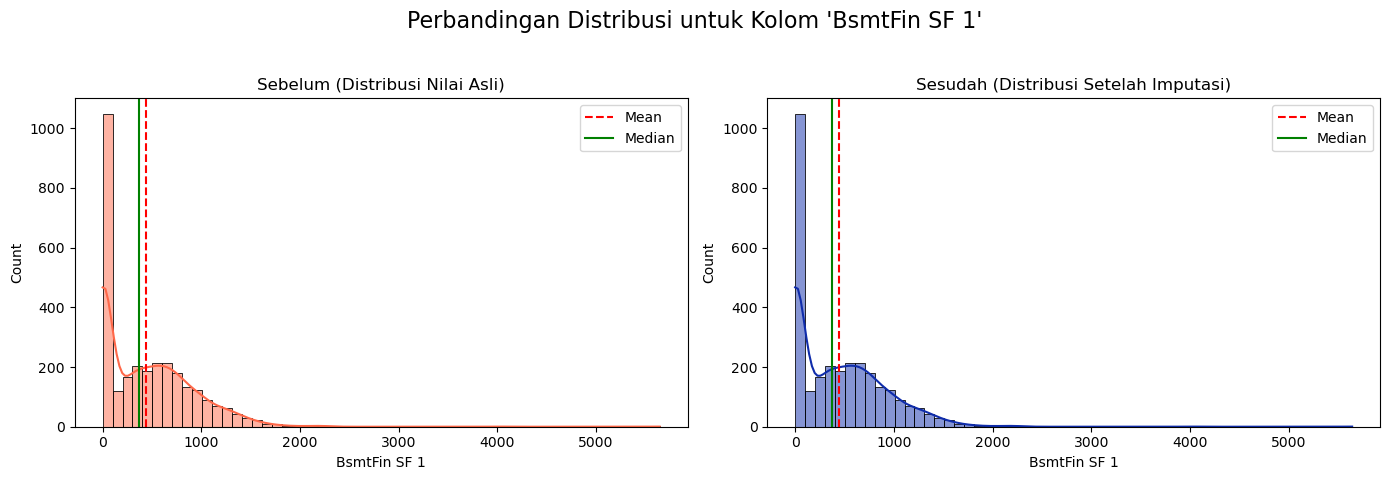

In [5]:
# Sel 7: Kode Contoh 2 - Peta Metode Spesifik
method_map = {
    'Lot Frontage': 'median',
    'Mas Vnr Area': 'mean',
    'Garage Yr Blt': 'mode',
    'Fence': 'constant', 
    'BsmtFin Type 1': 'ffill' # Contoh Forward Fill
}

imputer_manual = NoventisImputer(
    method=method_map, 
    fill_value='No Fence', # Hanya akan digunakan untuk kolom 'Fence'
    verbose=True
)
df_imputed_manual = imputer_manual.fit_transform(df_ames.copy())

print("\n--- Laporan Detail (Metode Spesifik) ---")
pprint(imputer_manual.get_quality_report())
imputer_manual.plot_comparison(max_cols=3)

# Contoh 3 - Menggunakan KNN Imputer


📋======================= IMPUTATION SUMMARY =======================📋
Method                    | knn
Total Values Imputed      | 513
Completion Score          | 100.00%

--- Laporan Detail (KNN) ---
{'column_details': {'Lot Frontage': {'method': 'knn', 'missing_before': 490},
                    'Mas Vnr Area': {'method': 'knn', 'missing_before': 23}},
 'overall_summary': {'completion_score': '100.00%',
                     'total_missing_after': 0,
                     'total_missing_before': 513,
                     'total_values_imputed': 513}}

📈 Membuat visualisasi perbandingan untuk imputasi...


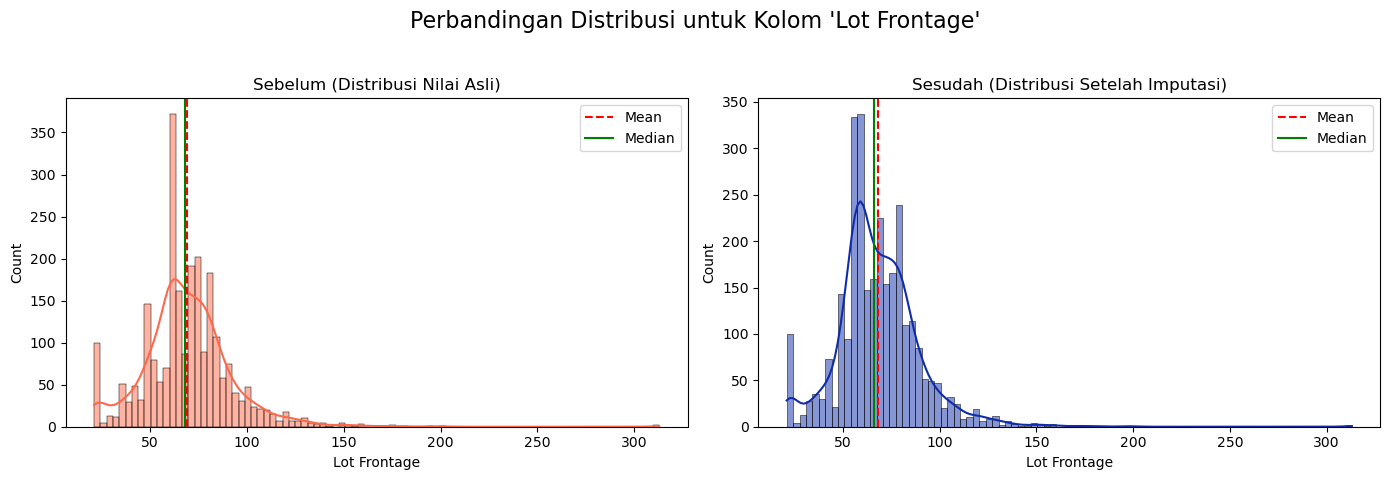

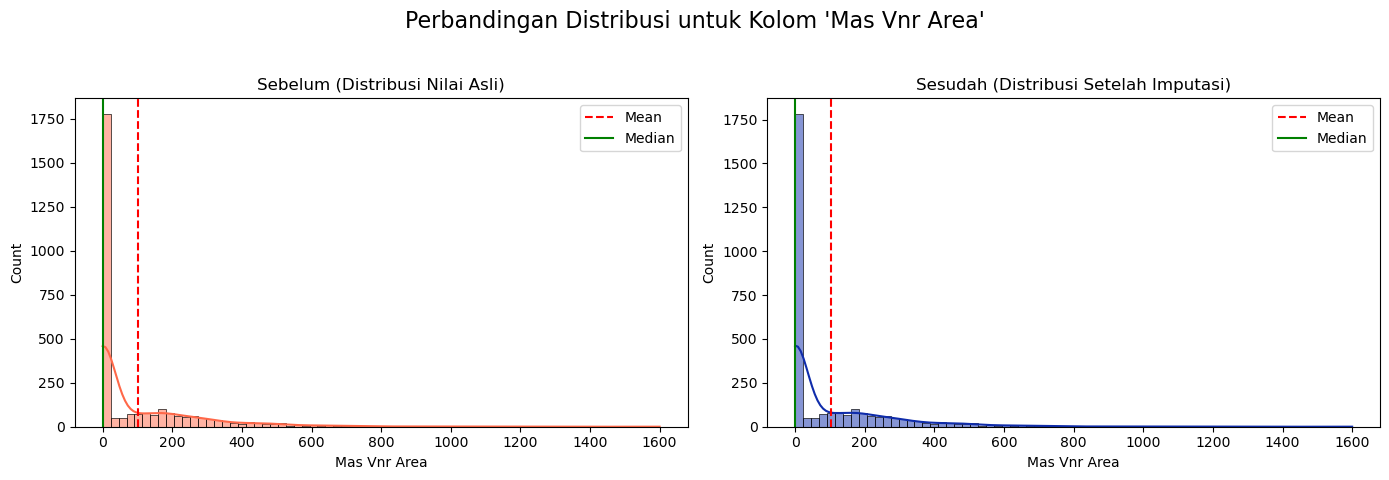

In [6]:
# Sel 9: Kode Contoh 3 - KNN pada Kolom Tertentu
# Skenario: Kita percaya 'Lot Frontage' dan 'Mas Vnr Area' berkorelasi, jadi kita gunakan KNN.
imputer_knn = NoventisImputer(
    method='knn', 
    columns=['Lot Frontage', 'Mas Vnr Area'],
    n_neighbors=5,
    verbose=True
)
df_imputed_knn = imputer_knn.fit_transform(df_ames.copy())

print("\n--- Laporan Detail (KNN) ---")
pprint(imputer_knn.get_quality_report())
imputer_knn.plot_comparison(max_cols=2)

# Contoh 4 - Menggunakan Metode Konstan

In [7]:
# --- Sel 7: Contoh 4 - Menggunakan Metode 'constant' ---
print("\n--- Menjalankan Imputer dengan Metode 'constant' ---")

# Skenario: Kita ingin mengisi semua nilai null di 'Mas Vnr Area' dengan 0
# dan 'Lot Frontage' dengan nilai rata-ratanya.

imputer_constant = NoventisImputer(columns=['Mas Vnr Area'], method='constant', fill_value=0)

df_ames_copy_2 = df_ames.copy()
df_imputed_constant = imputer_constant.fit_transform(df_ames_copy_2)

# Tampilkan laporan
print("\nLaporan Kualitas:")
pprint(imputer_constant.get_quality_report())

# Verifikasi
print("\nNilai null di 'Mas Vnr Area' setelah diisi dengan 0:")
print(df_imputed_constant['Mas Vnr Area'].isnull().sum())


--- Menjalankan Imputer dengan Metode 'constant' ---

📋======================= IMPUTATION SUMMARY =======================📋
Method                    | constant
Total Values Imputed      | 23
Completion Score          | 100.00%

Laporan Kualitas:
{'column_details': {'Mas Vnr Area': {'method': 'constant',
                                     'missing_before': 23}},
 'overall_summary': {'completion_score': '100.00%',
                     'total_missing_after': 0,
                     'total_missing_before': 23,
                     'total_values_imputed': 23}}

Nilai null di 'Mas Vnr Area' setelah diisi dengan 0:
0
